# 01 - CO2 Emissions 🌎

---

In [4]:
# TODO: Load and describe dataset
import pandas as pd

In [3]:
# TODO: Load and describe dataset
co2 = pd.read_csv('input/CO2_per_capita.csv', sep=';')
co2.describe

<bound method NDFrame.describe of       Country Name Country Code  Year  CO2 Per Capita (metric tons)
0            Aruba          ABW  1960                           NaN
1            Aruba          ABW  1961                           NaN
2            Aruba          ABW  1962                           NaN
3            Aruba          ABW  1963                           NaN
4            Aruba          ABW  1964                           NaN
...            ...          ...   ...                           ...
12891     Zimbabwe          ZWE  2007                      0.731867
12892     Zimbabwe          ZWE  2008                      0.569255
12893     Zimbabwe          ZWE  2009                      0.600521
12894     Zimbabwe          ZWE  2010                      0.646073
12895     Zimbabwe          ZWE  2011                      0.691698

[12896 rows x 4 columns]>

In [8]:
# TODO: Transform your data so that you can easily plot it
co2 = co2.sort_values('CO2 Per Capita (metric tons)', ascending=False)
print(co2[:20])

              Country Name Country Code  Year  CO2 Per Capita (metric tons)
321   United Arab Emirates          ARE  1969                     99.840439
9883                 Qatar          QAT  1963                     99.575940
9884                 Qatar          QAT  1964                     92.969565
9893                 Qatar          QAT  1973                     87.732829
9885                 Qatar          QAT  1965                     85.563167
9892                 Qatar          QAT  1972                     82.718938
325   United Arab Emirates          ARE  1973                     80.012045
9886                 Qatar          QAT  1966                     78.734608
9887                 Qatar          QAT  1967                     77.629183
323   United Arab Emirates          ARE  1971                     76.988876
9891                 Qatar          QAT  1971                     76.755883
9888                 Qatar          QAT  1968                     76.104350
6193        

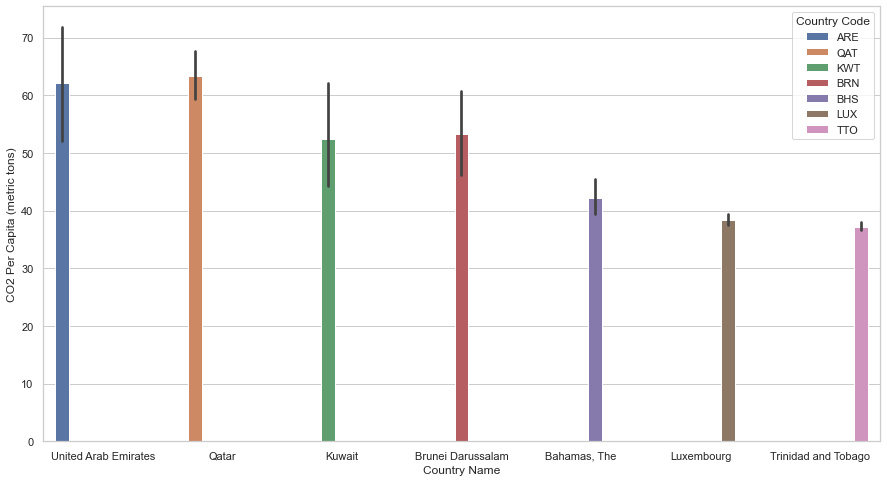

In [93]:
# TODO: Visualize your properly transformed dataframe
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Country Name", y="CO2 Per Capita (metric tons)",hue="Country Code", data=co2[:90])
sns.set(rc = {'figure.figsize':(15,8)})


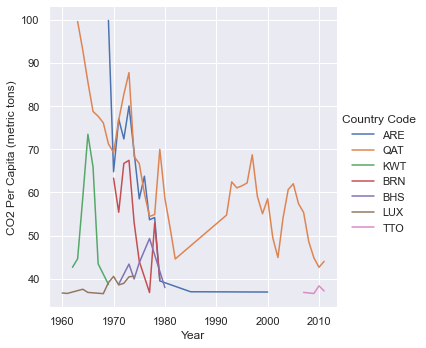

In [140]:
# TODO: Evolution of annual emissions per capita
ax = sns.relplot(x="Year",y="CO2 Per Capita (metric tons)", hue="Country Code",  kind="line",data=co2[:90])


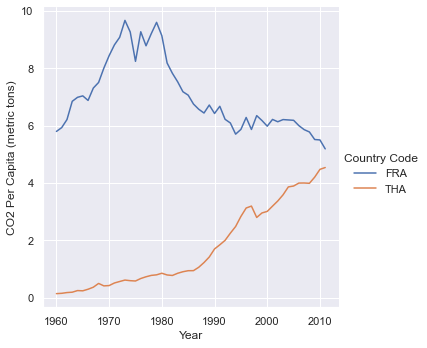

In [162]:
# TODO: Evolution of annual emissions per capita - France & Thailand
contrie_selected = co2.loc[(co2["Country Name"] == 'France') | (co2["Country Name"] == 'Thailand')]

ax = sns.relplot(x="Year",y="CO2 Per Capita (metric tons)", hue="Country Code",  kind="line",data=contrie_selected)

In [16]:
import requests

def get_boundingbox_country(country, output_as='boundingbox'):
    """
    get the bounding box of a country in EPSG4326 given a country name

    Parameters
    ----------
    country : str
        name of the country in english and lowercase
    output_as : 'str
        chose from 'boundingbox' or 'center'. 
         - 'boundingbox' for [latmin, latmax, lonmin, lonmax]
         - 'center' for [latcenter, loncenter]

    Returns
    -------
    output : list
        list with coordinates as str
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?country=',
                             country,
                             '&format=json&polygon=0')
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
    return output

# Example
print("Coordinates of France are long={} and lat={}".format(
            get_boundingbox_country("France", output_as="center")[0],
            get_boundingbox_country("France", output_as="center")[1]))

Coordinates of France are long=46.603354 and lat=1.8883335


In [7]:
# TODO: Visualize your data on a World map